In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

# DeepMoD stuff
from deepymod_torch.DeepMod import DeepMod
from deepymod_torch.library_functions import library_basic_t
from deepymod_torch.utilities import create_deriv_data, terms_definition

# Setting cuda if GPU is available
if torch.cuda.is_available():
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

# Settings for reproducibility
np.random.seed(42)
torch.manual_seed(1)

/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [2]:
data = np.load('lorenz.npy', allow_pickle=True)

In [3]:
print('Shape of grid:', data.shape)

Shape of grid: (4, 13001)


In [4]:
X = data[0].reshape(data[0].size, 1)/2

In [5]:
X.shape

(13001, 1)

In [6]:
y=np.transpose((data[1].flatten(), data[2].flatten(), data[3].flatten()))/20

In [7]:
y.shape

(13001, 3)

In [8]:
y
y.shape

(13001, 3)

In [9]:
X

array([[0.0000e+00],
       [5.0000e-05],
       [1.0000e-04],
       ...,
       [6.4990e-01],
       [6.4995e-01],
       [6.5000e-01]])

In [10]:
number_of_samples = 1000

idx = np.random.permutation(y.shape[0])
X_train = torch.tensor(X[idx, :][:number_of_samples], dtype=torch.float32)
y_train = torch.tensor(y[idx, :][:number_of_samples], dtype=torch.float32,requires_grad=True)

In [11]:
print(X_train.shape, y_train.shape)

torch.Size([1000, 1]) torch.Size([1000, 3])


In [12]:
config = {'input_dim': 1, 'hidden_dim': 50, 'layers': 5, 'output_dim': 3, 'library_function': library_basic_t, 'library_args':{'poly_order': 1, 'diff_order': 1}}

In [13]:
model = DeepMod(config)

In [14]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
X_input = create_deriv_data(X_train, config['library_args']['diff_order'])

In [15]:
X_input[1].shape

torch.Size([1000, 1, 1, 1])

In [16]:
q = model(X_input)

In [17]:
q[2][0].shape

torch.Size([1000, 5])

In [18]:
model.train(X_input, y_train, optimizer, 50000, type='deepmod')

| Iteration | Progress | Time remaining |     Cost |      MSE |      Reg |       L1 |
      50000    100.00%               0s   8.87e-02   8.19e-02   6.73e-03   9.09e-05 
[Parameter containing:
tensor([[-10.3955]], requires_grad=True), Parameter containing:
tensor([[-16.7254]], requires_grad=True), Parameter containing:
tensor([[ 9.8775],
        [13.2536]], requires_grad=True)]
[tensor([4]), tensor([4]), tensor([1, 3])]

| Iteration | Progress | Time remaining |     Cost |      MSE |      Reg |       L1 |
      50000    100.00%               0s   1.57e+02   8.10e-02   1.57e+02   0.00e+00 

In [19]:
result = model(X_input)[0][0]

In [20]:
result = result.detach().numpy()

In [21]:
result.shape

(1000, 3)

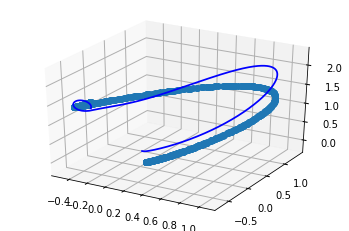

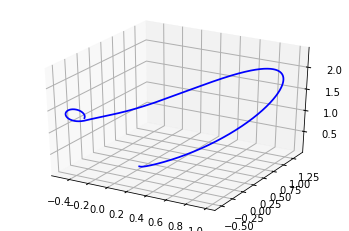

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1)
ax = fig.gca(projection='3d')

ax.plot(result[:,0],result[:,1],result[:,2],'o')
ax.plot(y[:,0],y[:,1],y[:,2],'b')
fig2=plt.figure(2)
bx=fig2.gca(projection='3d')
bx.plot(y[:,0],y[:,1],y[:,2],'b')

plt.show();